In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly_express as px

In [2]:
plt.style.use(['dark_background'])

In [3]:
data = pd.read_csv('./data/데이터_초안_0812.csv', sep=',', encoding = 'euc-kr')
data
# 조사회차	패널ID	15세 아버지 직업	아버지 최종학력	15세 가정 형편	15세 부모님 관계	연령	학력	
# 결혼경험	고등학교 종류	대학전공	대학소재지	일자리구분(정규/비정규)	직위	직장종류	사업체 직원 수	
# 월 급여	첫 직장입직	첫 직장 퇴직	첫직장 유지	새로운 일자리 입직	하던일 퇴직	최근 일자리 그만둔 시점	
# 이전일자리 입직	이전일자리 퇴직

data.columns = ['case', 'ID', 'fa_job', 'fa_edu', 'life_15', 'fama_rel_15', 'age', 'edu', 
                'marry_YN','hschool','univ_mjor', 'univ_area', 'jung_bi', 'level', 'j_type', 'job_pp', 
                'JOBSAL', 'job_1_in', 'job_1_out', 'job_1_keep', 'njob_in', 'njob_out', 'rjob_out', 
                'pjob_in', 'pjob_out']
data_1 = data.copy()
data_1 = data_1[2:]
data_1.tail()

C:\Users\eunice\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


case       ID fa_job fa_edu life_15 fama_rel_15 age edu marry_YN  \
62423    6  6204702      6      1       3           2  59   4        1   
62424    7  6204702      6      1       3           2  61   4        1   
62425    6  6204802      6      2       4           2  53   4        1   
62426    6  6204901      6      2       3           2  61   2        1   
62427    7  6204901      6      2       3           2  63   2        1   

      hschool  ... job_pp JOBSAL job_1_in job_1_out job_1_keep njob_in  \
62423       3  ...    NaN      0     1976      1978          2     NaN   
62424     NaN  ...    NaN      0      NaN       NaN        NaN     NaN   
62425       3  ...    NaN      0     1984       NaN          1     NaN   
62426     NaN  ...    NaN     60     1977       NaN          1    1978   
62427     NaN  ...    NaN     60      NaN       NaN        NaN     NaN   

      njob_out rjob_out pjob_in pjob_out  
62423      NaN      NaN     NaN      NaN  
62424      NaN      NaN     NaN      NaN  
62425      NaN      NaN     NaN      NaN  
62426      NaN      NaN     NaN      NaN  
62427      NaN      NaN     NaN      NaN  

[5 rows x 25 columns]

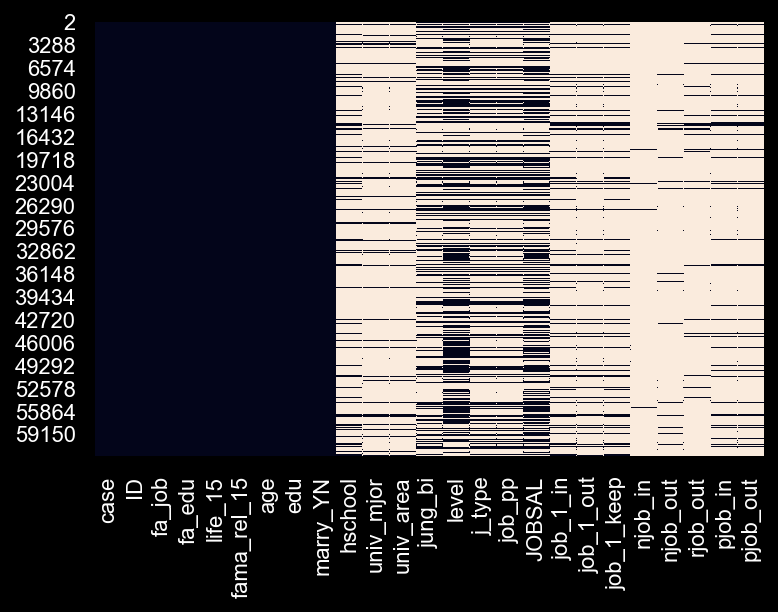

In [4]:
sns.heatmap(data_1.isnull(), cbar=False);

### 급여 결측치 처리 0, 음수값 삭제
### upper fence 350 이상 삭제

In [5]:
data_1['JOBSAL'].isnull().value_counts()

True     33029
False    29397
Name: JOBSAL, dtype: int64

In [6]:
data_1.drop(data_1[data_1['JOBSAL'].isnull()].index, inplace=True)

In [7]:
data_1[data_1['JOBSAL'] == 0]['JOBSAL'].value_counts()

0.0    2942
Name: JOBSAL, dtype: int64

In [8]:
data_1['JOBSAL'] = data_1['JOBSAL'].astype("float")

In [9]:
data_1.drop(data_1[data_1['JOBSAL'] <= 0].index, inplace=True)

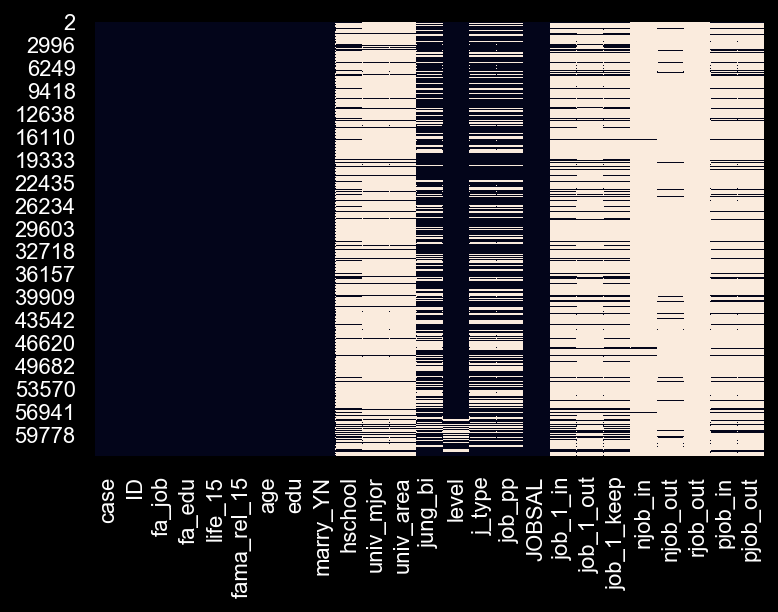

In [10]:
sns.heatmap(data_1.isnull(), cbar=False);

In [11]:
# 이상치 삭제
data_1 = data_1[data_1['JOBSAL'] < 350]

In [12]:
# 월급의 분포 확인하기 
fig = px.histogram(data_1, x='JOBSAL')
fig.show()

In [13]:
data_1 = data_1.replace('', np.nan)
data_1 = data_1.astype("float")
data_1.reset_index(inplace=True, drop=True)
data_1.tail()

case         ID  fa_job  fa_edu  life_15  fama_rel_15   age  edu  \
23999   7.0  6204402.0     7.0     3.0      3.0          3.0  51.0  7.0   
24000   6.0  6204502.0     6.0     2.0      3.0          2.0  41.0  4.0   
24001   7.0  6204502.0     6.0     2.0      3.0          2.0  43.0  4.0   
24002   6.0  6204901.0     6.0     2.0      3.0          2.0  61.0  2.0   
24003   7.0  6204901.0     6.0     2.0      3.0          2.0  63.0  2.0   

       marry_YN  hschool  ...  job_pp  JOBSAL  job_1_in  job_1_out  \
23999       1.0      NaN  ...     4.0   180.0       NaN        NaN   
24000       1.0      3.0  ...     3.0   150.0    1993.0     2014.0   
24001       1.0      NaN  ...     4.0   170.0       NaN        NaN   
24002       1.0      NaN  ...     NaN    60.0    1977.0        NaN   
24003       1.0      NaN  ...     NaN    60.0       NaN        NaN   

       job_1_keep  njob_in  njob_out  rjob_out  pjob_in  pjob_out  
23999         NaN      NaN       NaN       NaN      NaN       NaN  
24000         2.0      NaN       NaN       NaN      NaN       NaN  
24001         NaN      NaN       NaN       NaN      NaN       NaN  
24002         1.0   1978.0       NaN       NaN      NaN       NaN  
24003         NaN      NaN       NaN       NaN      NaN       NaN  

[5 rows x 25 columns]

In [14]:
# 첫 직장 입직년도를 1990년도 이후로 선별
data_1_1990 = data_1[data_1['job_1_in']>=1990]
data_1_1990.reset_index(drop=True)

case         ID  fa_job  fa_edu  life_15  fama_rel_15   age  edu  \
0      1.0      702.0     7.0     2.0      5.0          2.0  35.0  4.0   
1      1.0      802.0     3.0     4.0      3.0          3.0  33.0  7.0   
2      1.0     1002.0     5.0     4.0      3.0          2.0  33.0  7.0   
3      1.0     1202.0     5.0     3.0      3.0          2.0  32.0  4.0   
4      1.0     1302.0     4.0     4.0      3.0          2.0  27.0  4.0   
...    ...        ...     ...     ...      ...          ...   ...  ...   
2422   6.0  6203301.0     4.0     4.0      4.0          3.0  47.0  5.0   
2423   6.0  6203501.0     6.0     3.0      3.0          2.0  57.0  5.0   
2424   6.0  6204202.0     6.0     2.0      4.0          3.0  42.0  4.0   
2425   6.0  6204303.0     7.0     4.0      3.0          2.0  28.0  8.0   
2426   6.0  6204502.0     6.0     2.0      3.0          2.0  41.0  4.0   

      marry_YN  hschool  ...  job_pp  JOBSAL  job_1_in  job_1_out  job_1_keep  \
0          1.0      3.0  ...     6.0   250.0    1990.0     1991.0         2.0   
1          1.0      1.0  ...     4.0   167.0    1995.0     1997.0         2.0   
2          1.0      1.0  ...     NaN   200.0    1997.0     1999.0         2.0   
3          1.0      3.0  ...     NaN   200.0    1994.0     1997.0         2.0   
4          1.0      3.0  ...     1.0   150.0    1999.0     2001.0         2.0   
...        ...      ...  ...     ...     ...       ...        ...         ...   
2422       1.0      1.0  ...     4.0   100.0    2007.0        NaN         1.0   
2423       1.0      1.0  ...     4.0    60.0    2013.0        NaN         1.0   
2424       1.0      3.0  ...     1.0    60.0    1994.0     1999.0         2.0   
2425       2.0      1.0  ...     3.0   250.0    2011.0     2014.0         2.0   
2426       1.0      3.0  ...     3.0   150.0    1993.0     2014.0         2.0   

      njob_in  njob_out  rjob_out  pjob_in  pjob_out  
0         NaN       NaN       NaN   1992.0    1993.0  
1         NaN       NaN       NaN   1998.0    1999.0  
2         NaN       NaN       NaN   1997.0    1999.0  
3         NaN       NaN       NaN   1994.0    1997.0  
4         NaN       NaN       NaN   1999.0    2001.0  
...       ...       ...       ...      ...       ...  
2422      NaN       NaN       NaN      NaN       NaN  
2423      NaN       NaN       NaN      NaN       NaN  
2424      NaN    1999.0       NaN   2014.0    2015.0  
2425      NaN       NaN       NaN   2011.0    2014.0  
2426      NaN       NaN       NaN      NaN       NaN  

[2427 rows x 25 columns]

In [15]:
# 나이를 60세 이하로 선별
data_1_1990_age = data_1_1990[data_1_1990['age'] <= 60]
data_1_1990_age.reset_index(drop=True)

case         ID  fa_job  fa_edu  life_15  fama_rel_15   age  edu  \
0      1.0      702.0     7.0     2.0      5.0          2.0  35.0  4.0   
1      1.0      802.0     3.0     4.0      3.0          3.0  33.0  7.0   
2      1.0     1002.0     5.0     4.0      3.0          2.0  33.0  7.0   
3      1.0     1202.0     5.0     3.0      3.0          2.0  32.0  4.0   
4      1.0     1302.0     4.0     4.0      3.0          2.0  27.0  4.0   
...    ...        ...     ...     ...      ...          ...   ...  ...   
2376   6.0  6203301.0     4.0     4.0      4.0          3.0  47.0  5.0   
2377   6.0  6203501.0     6.0     3.0      3.0          2.0  57.0  5.0   
2378   6.0  6204202.0     6.0     2.0      4.0          3.0  42.0  4.0   
2379   6.0  6204303.0     7.0     4.0      3.0          2.0  28.0  8.0   
2380   6.0  6204502.0     6.0     2.0      3.0          2.0  41.0  4.0   

      marry_YN  hschool  ...  job_pp  JOBSAL  job_1_in  job_1_out  job_1_keep  \
0          1.0      3.0  ...     6.0   250.0    1990.0     1991.0         2.0   
1          1.0      1.0  ...     4.0   167.0    1995.0     1997.0         2.0   
2          1.0      1.0  ...     NaN   200.0    1997.0     1999.0         2.0   
3          1.0      3.0  ...     NaN   200.0    1994.0     1997.0         2.0   
4          1.0      3.0  ...     1.0   150.0    1999.0     2001.0         2.0   
...        ...      ...  ...     ...     ...       ...        ...         ...   
2376       1.0      1.0  ...     4.0   100.0    2007.0        NaN         1.0   
2377       1.0      1.0  ...     4.0    60.0    2013.0        NaN         1.0   
2378       1.0      3.0  ...     1.0    60.0    1994.0     1999.0         2.0   
2379       2.0      1.0  ...     3.0   250.0    2011.0     2014.0         2.0   
2380       1.0      3.0  ...     3.0   150.0    1993.0     2014.0         2.0   

      njob_in  njob_out  rjob_out  pjob_in  pjob_out  
0         NaN       NaN       NaN   1992.0    1993.0  
1         NaN       NaN       NaN   1998.0    1999.0  
2         NaN       NaN       NaN   1997.0    1999.0  
3         NaN       NaN       NaN   1994.0    1997.0  
4         NaN       NaN       NaN   1999.0    2001.0  
...       ...       ...       ...      ...       ...  
2376      NaN       NaN       NaN      NaN       NaN  
2377      NaN       NaN       NaN      NaN       NaN  
2378      NaN    1999.0       NaN   2014.0    2015.0  
2379      NaN       NaN       NaN   2011.0    2014.0  
2380      NaN       NaN       NaN      NaN       NaN  

[2381 rows x 25 columns]

In [16]:
data_1_1990_age['case'].value_counts()

1.0    1349
6.0     680
3.0      93
2.0      86
7.0      63
4.0      60
5.0      50
Name: case, dtype: int64

In [17]:
# 첫직장 퇴직시점에 na값이 1245개 발견
data_1_1990_age = data_1_1990_age.fillna(0)
np.unique(data_1_1990_age['job_1_out'], return_counts=True)

(array([  -9.,    0., 1990., 1991., 1992., 1993., 1994., 1995., 1996.,
        1997., 1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005.,
        2006., 2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014.,
        2015., 2016., 2017., 2018.]),
 array([  12, 1123,   10,   20,   49,   60,   69,   89,   66,   74,   58,
          81,   64,   66,   74,   76,   63,   63,   63,   47,   28,   14,
          22,   13,   18,   19,   17,   11,    8,    3,    1], dtype=int64))

In [18]:
# 첫 직장 유지여부 확인하여 첫직장 퇴직연도 넣어주기
data_1_1990_age['job_1_out_2'] = np.where(data_1_1990_age['job_1_keep'] == 1, data_1_1990_age['case'],
                                          (np.where( data_1_1990_age['job_1_out'] != 0 , data_1_1990_age['job_1_out'],
                                                   data_1_1990_age['pjob_out'])))

In [19]:
# 첫직장 유지할 경우 마지막 조사차수를 퇴직년도로 넣기
data_1_1990_age['job_1_out_2'] = data_1_1990_age['job_1_out_2']\
.replace(1, 2007).replace(2, 2008).replace(3, 2010).replace(4, 2012)\
.replace(5, 2014).replace(6, 2016).replace(7, 2018)

data_1_1990_age.reset_index(drop=True).tail()

case         ID  fa_job  fa_edu  life_15  fama_rel_15   age  edu  \
2376   6.0  6203301.0     4.0     4.0      4.0          3.0  47.0  5.0   
2377   6.0  6203501.0     6.0     3.0      3.0          2.0  57.0  5.0   
2378   6.0  6204202.0     6.0     2.0      4.0          3.0  42.0  4.0   
2379   6.0  6204303.0     7.0     4.0      3.0          2.0  28.0  8.0   
2380   6.0  6204502.0     6.0     2.0      3.0          2.0  41.0  4.0   

      marry_YN  hschool  ...  JOBSAL  job_1_in  job_1_out  job_1_keep  \
2376       1.0      1.0  ...   100.0    2007.0        0.0         1.0   
2377       1.0      1.0  ...    60.0    2013.0        0.0         1.0   
2378       1.0      3.0  ...    60.0    1994.0     1999.0         2.0   
2379       2.0      1.0  ...   250.0    2011.0     2014.0         2.0   
2380       1.0      3.0  ...   150.0    1993.0     2014.0         2.0   

      njob_in  njob_out  rjob_out  pjob_in  pjob_out  job_1_out_2  
2376      0.0       0.0       0.0      0.0       0.0       2016.0  
2377      0.0       0.0       0.0      0.0       0.0       2016.0  
2378      0.0    1999.0       0.0   2014.0    2015.0       1999.0  
2379      0.0       0.0       0.0   2011.0    2014.0       2014.0  
2380      0.0       0.0       0.0      0.0       0.0       2014.0  

[5 rows x 26 columns]

In [20]:
# 패널별 마지막 조사차수로 정렬
ata_1_1990_age = data_1_1990_age.groupby("ID").max()
data_1_1990_age.reset_index(drop=True).tail()

case         ID  fa_job  fa_edu  life_15  fama_rel_15   age  edu  \
2376   6.0  6203301.0     4.0     4.0      4.0          3.0  47.0  5.0   
2377   6.0  6203501.0     6.0     3.0      3.0          2.0  57.0  5.0   
2378   6.0  6204202.0     6.0     2.0      4.0          3.0  42.0  4.0   
2379   6.0  6204303.0     7.0     4.0      3.0          2.0  28.0  8.0   
2380   6.0  6204502.0     6.0     2.0      3.0          2.0  41.0  4.0   

      marry_YN  hschool  ...  JOBSAL  job_1_in  job_1_out  job_1_keep  \
2376       1.0      1.0  ...   100.0    2007.0        0.0         1.0   
2377       1.0      1.0  ...    60.0    2013.0        0.0         1.0   
2378       1.0      3.0  ...    60.0    1994.0     1999.0         2.0   
2379       2.0      1.0  ...   250.0    2011.0     2014.0         2.0   
2380       1.0      3.0  ...   150.0    1993.0     2014.0         2.0   

      njob_in  njob_out  rjob_out  pjob_in  pjob_out  job_1_out_2  
2376      0.0       0.0       0.0      0.0       0.0       2016.0  
2377      0.0       0.0       0.0      0.0       0.0       2016.0  
2378      0.0    1999.0       0.0   2014.0    2015.0       1999.0  
2379      0.0       0.0       0.0   2011.0    2014.0       2014.0  
2380      0.0       0.0       0.0      0.0       0.0       2014.0  

[5 rows x 26 columns]

In [21]:
data_1_1990_age['case'].value_counts()

1.0    1349
6.0     680
3.0      93
2.0      86
7.0      63
4.0      60
5.0      50
Name: case, dtype: int64

In [22]:
# 기존 첫직장 퇴직 컬럼 삭제
data_1_1990_age= data_1_1990_age.drop("job_1_out", axis=1) 

In [23]:
data_1_1990_age.columns

Index(['case', 'ID', 'fa_job', 'fa_edu', 'life_15', 'fama_rel_15', 'age',
       'edu', 'marry_YN', 'hschool', 'univ_mjor', 'univ_area', 'jung_bi',
       'level', 'j_type', 'job_pp', 'JOBSAL', 'job_1_in', 'job_1_keep',
       'njob_in', 'njob_out', 'rjob_out', 'pjob_in', 'pjob_out',
       'job_1_out_2'],
      dtype='object')

In [24]:
# 컬럼 위치 재정비
data_1_1990_age = data_1_1990_age[['case', 'fa_job', 'fa_edu', 'life_15', 'fama_rel_15', 'age', 'edu',
       'marry_YN', 'hschool', 'univ_mjor', 'univ_area', 'jung_bi', 'level',
       'j_type', 'job_pp', 'job_1_in', 'job_1_out_2', 'job_1_keep', 'njob_in',
       'njob_out', 'rjob_out', 'pjob_in', 'pjob_out', 'JOBSAL',]]

In [25]:
# 첫직장 퇴직년도 입력 확인
np.unique(data_1_1990_age['job_1_out_2'], return_counts = True)

(array([  -9., 1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997.,
        1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006.,
        2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015.,
        2016., 2017., 2018.]),
 array([ 12,  10,  20,  49,  60,  69,  90,  66,  74,  58,  81,  64,  66,
         74,  76,  63,  63,  63, 579,  80,  14,  98,  13,  64,  19,  58,
         11, 332,   3,  52], dtype=int64))

In [26]:
# 경력 컬럼 추가 -> working_y
data_1_1990_age['working_y']=" "
data_1_1990_age.reset_index(drop=True).tail()

case  fa_job  fa_edu  life_15  fama_rel_15   age  edu  marry_YN  \
2376   6.0     4.0     4.0      4.0          3.0  47.0  5.0       1.0   
2377   6.0     6.0     3.0      3.0          2.0  57.0  5.0       1.0   
2378   6.0     6.0     2.0      4.0          3.0  42.0  4.0       1.0   
2379   6.0     7.0     4.0      3.0          2.0  28.0  8.0       2.0   
2380   6.0     6.0     2.0      3.0          2.0  41.0  4.0       1.0   

      hschool  univ_mjor  ...  job_1_in  job_1_out_2  job_1_keep  njob_in  \
2376      1.0        0.0  ...    2007.0       2016.0         1.0      0.0   
2377      1.0        0.0  ...    2013.0       2016.0         1.0      0.0   
2378      3.0        0.0  ...    1994.0       1999.0         2.0      0.0   
2379      1.0       12.0  ...    2011.0       2014.0         2.0      0.0   
2380      3.0        0.0  ...    1993.0       2014.0         2.0      0.0   

      njob_out  rjob_out  pjob_in  pjob_out  JOBSAL  working_y  
2376       0.0       0.0      0.0       0.0   100.0             
2377       0.0       0.0      0.0       0.0    60.0             
2378    1999.0       0.0   2014.0    2015.0    60.0             
2379       0.0       0.0   2011.0    2014.0   250.0             
2380       0.0       0.0      0.0       0.0   150.0             

[5 rows x 25 columns]

In [27]:
# 첫직장을 유지하지 않은 사람들의 퇴직년도가 입력되지않아서 분류해서 추가 
keep1 = data_1_1990_age[data_1_1990_age['job_1_keep']==1]
keep2 = data_1_1990_age[data_1_1990_age['job_1_keep']==2]

In [28]:
# 행별 계산이 가능한지 test
keep1['working_y'].values[1] = keep1['job_1_out_2'].values[1] - keep1['job_1_in'].values[1]
keep1.head()

case  fa_job  fa_edu  life_15  fama_rel_15   age  edu  marry_YN  hschool  \
45    1.0     5.0     4.0      3.0          2.0  32.0  6.0       1.0      1.0   
73    4.0     2.0     6.0      3.0          4.0  19.0  5.0       2.0      1.0   
76    5.0     8.0     4.0      3.0          3.0  19.0  4.0       2.0      3.0   
86    4.0     7.0     3.0      3.0          3.0  19.0  4.0       2.0      3.0   
110   3.0     7.0     3.0      4.0          3.0  25.0  7.0       2.0      1.0   

     univ_mjor  ...  job_1_in  job_1_out_2  job_1_keep  njob_in  njob_out  \
45         7.0  ...    1997.0       2007.0         1.0      0.0       0.0   
73         0.0  ...    2011.0       2012.0         1.0      0.0       0.0   
76         0.0  ...    2014.0       2014.0         1.0      0.0       0.0   
86         0.0  ...    2011.0       2012.0         1.0      0.0       0.0   
110        1.0  ...    2010.0       2010.0         1.0      0.0       0.0   

     rjob_out  pjob_in  pjob_out  JOBSAL  working_y  
45        0.0      0.0       0.0   180.0             
73        0.0      0.0       0.0    32.0          1  
76        0.0      0.0       0.0   100.0             
86        0.0      0.0       0.0   220.0             
110       0.0   2009.0    2010.0   130.0             

[5 rows x 25 columns]

In [29]:
# case 1 : 첫직장을 유지
# -> 첫직장 입직/퇴직으로 총 경력계산 가능
for i in range(len(keep1['job_1_out_2'])):
    keep1['working_y'].values[i] = keep1['job_1_out_2'].values[i] - keep1['job_1_in'].values[i]

In [30]:
keep1['working_y'].value_counts()

 0.0     236
 1.0     135
 2.0     116
 3.0      77
 4.0      75
 5.0      73
 7.0      55
 6.0      46
 9.0      39
 8.0      38
 12.0     30
 10.0     26
 13.0     25
 14.0     24
 16.0     23
 15.0     22
 11.0     22
 17.0     17
-1.0      16
 18.0      6
 22.0      5
 26.0      4
 19.0      3
 20.0      3
 21.0      3
 24.0      2
 23.0      1
 25.0      1
Name: working_y, dtype: int64

In [31]:
np.unique(keep1['working_y'], return_counts=True)

(array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0,
        12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0,
        23.0, 24.0, 25.0, 26.0], dtype=object),
 array([ 16, 236, 135, 116,  77,  75,  73,  46,  55,  38,  39,  26,  22,
         30,  25,  24,  22,  23,  17,   6,   3,   3,   3,   5,   1,   2,
          1,   4], dtype=int64))

In [32]:
# case 2 : 첫직장을 유지하지 않을 경우
# -> 첫직장 퇴직이 이전직장 퇴직과 같을 경우 -> 이전직장 경력
# -> 첫직장 퇴직이 이전직장 퇴직과 다를 경우 -> 첫직장 입직/퇴직 + 이전직장 입직/퇴직
for i in range(0, len(keep2)-1):
#     keep2['job_1_out_2'].values[i]
    if keep2['job_1_out_2'].values[i] == keep2['pjob_out'].values[i]:
        keep2['working_y'].values[i] = keep2['pjob_out'].values[i] - keep2['job_1_in'].values[i]
    else: 
        keep2['working_y'].values[i] = (keep2['job_1_out_2'].values[i] - keep2['job_1_in'].values[i]) + (keep2['pjob_out'].values[i] - keep2['pjob_in'].values[i])

In [33]:
keep2['working_y'].value_counts()

2.0        228
1.0        207
3.0        179
4.0        146
0.0        122
5.0         92
7.0         58
6.0         58
8.0         36
10.0        30
9.0         25
11.0        13
12.0        13
13.0        11
14.0         8
15.0         4
17.0         3
16.0         2
18.0         2
19.0         2
-2007.0      2
-1991.0      1
-1995.0      1
-1996.0      1
-1997.0      1
-2001.0      1
-2003.0      1
-2008.0      1
-2009.0      1
-2010.0      1
-2011.0      1
-2012.0      1
31.0         1
26.0         1
25.0         1
23.0         1
             1
Name: working_y, dtype: int64

In [34]:
data_fin = pd.concat([keep1, keep2])
data_fin.reset_index(drop=True).tail()

case  fa_job  fa_edu  life_15  fama_rel_15   age  edu  marry_YN  \
2375   6.0    12.0     0.0      2.0          6.0  36.0  7.0       1.0   
2376   6.0     8.0     3.0      3.0          3.0  36.0  4.0       1.0   
2377   6.0     6.0     2.0      4.0          3.0  42.0  4.0       1.0   
2378   6.0     7.0     4.0      3.0          2.0  28.0  8.0       2.0   
2379   6.0     6.0     2.0      3.0          2.0  41.0  4.0       1.0   

      hschool  univ_mjor  ...  job_1_in  job_1_out_2  job_1_keep  njob_in  \
2375      1.0       10.0  ...    2003.0       2004.0         2.0      0.0   
2376      3.0        0.0  ...    2001.0       2006.0         2.0      0.0   
2377      3.0        0.0  ...    1994.0       1999.0         2.0      0.0   
2378      1.0       12.0  ...    2011.0       2014.0         2.0      0.0   
2379      3.0        0.0  ...    1993.0       2014.0         2.0      0.0   

      njob_out  rjob_out  pjob_in  pjob_out  JOBSAL  working_y  
2375    2008.0       0.0   2006.0    2008.0   250.0          3  
2376       0.0       0.0      0.0       0.0   200.0          5  
2377    1999.0       0.0   2014.0    2015.0    60.0          6  
2378       0.0       0.0   2011.0    2014.0   250.0          3  
2379       0.0       0.0      0.0       0.0   150.0             

[5 rows x 25 columns]

In [35]:
data_fin['working_y'].unique()

array([10.0, 1.0, 0.0, 9.0, 2.0, 19.0, 5.0, 4.0, 6.0, 8.0, 11.0, 15.0,
       7.0, 14.0, -1.0, 3.0, 17.0, 12.0, 16.0, 13.0, 20.0, 26.0, 18.0,
       22.0, 23.0, 21.0, 24.0, 25.0, -1995.0, -2003.0, -2007.0, -1996.0,
       -1991.0, -2011.0, -2001.0, -1997.0, -2008.0, -2009.0, -2010.0,
       -2012.0, 31.0, ' '], dtype=object)

In [36]:
data_fin['working_y'].replace(' ',"0", inplace=True)
data_fin['working_y'] = data_fin['working_y'].astype('int')
np.unique(data_fin['working_y'], return_counts=True)

(array([-2012, -2011, -2010, -2009, -2008, -2007, -2003, -2001, -1997,
        -1996, -1995, -1991,    -1,     0,     1,     2,     3,     4,
            5,     6,     7,     8,     9,    10,    11,    12,    13,
           14,    15,    16,    17,    18,    19,    20,    21,    22,
           23,    24,    25,    26,    31]),
 array([  1,   1,   1,   1,   1,   2,   1,   1,   1,   1,   1,   1,  16,
        359, 342, 344, 256, 221, 165, 104, 113,  74,  64,  56,  35,  43,
         36,  32,  26,  25,  20,   8,   5,   3,   3,   5,   2,   2,   2,
          5,   1], dtype=int64))

In [37]:
# 총 5497개에서 42개의 데이터가 음수 & 2000년 이상 나옴 -> drop 결정
a = data_fin[data_fin['working_y']>=2000].index
b = data_fin[data_fin['working_y']<=0].index

In [38]:
data_fin = data_fin.drop(a)
data_fin = data_fin.drop(b)
data_fin.reset_index(drop=True, inplace=True)

In [39]:
data_fin.tail()

case  fa_job  fa_edu  life_15  fama_rel_15   age  edu  marry_YN  \
1987   6.0     7.0     4.0      3.0          3.0  47.0  7.0       1.0   
1988   6.0    12.0     0.0      2.0          6.0  36.0  7.0       1.0   
1989   6.0     8.0     3.0      3.0          3.0  36.0  4.0       1.0   
1990   6.0     6.0     2.0      4.0          3.0  42.0  4.0       1.0   
1991   6.0     7.0     4.0      3.0          2.0  28.0  8.0       2.0   

      hschool  univ_mjor  ...  job_1_in  job_1_out_2  job_1_keep  njob_in  \
1987      1.0        6.0  ...    1992.0       1994.0         2.0      0.0   
1988      1.0       10.0  ...    2003.0       2004.0         2.0      0.0   
1989      3.0        0.0  ...    2001.0       2006.0         2.0      0.0   
1990      3.0        0.0  ...    1994.0       1999.0         2.0      0.0   
1991      1.0       12.0  ...    2011.0       2014.0         2.0      0.0   

      njob_out  rjob_out  pjob_in  pjob_out  JOBSAL  working_y  
1987    1994.0       0.0   1992.0    1994.0   200.0          2  
1988    2008.0       0.0   2006.0    2008.0   250.0          3  
1989       0.0       0.0      0.0       0.0   200.0          5  
1990    1999.0       0.0   2014.0    2015.0    60.0          6  
1991       0.0       0.0   2011.0    2014.0   250.0          3  

[5 rows x 25 columns]

In [40]:
data_fin['working_y'].value_counts()

2     344
1     342
3     256
4     221
5     165
7     113
6     104
8      74
9      64
10     56
12     43
13     36
11     35
14     32
15     26
16     25
17     20
18      8
26      5
19      5
22      5
20      3
21      3
23      2
24      2
25      2
31      1
Name: working_y, dtype: int64

> 첫직장 퇴직부터 이전직장퇴직까지는 경력 산출 용도로 추출하여 drop함

In [41]:
# drop하여 새로운 변수 생성
data_fin_drop = data_fin.drop(['job_1_out_2', 'job_1_keep', 'njob_in',
                    'njob_out', 'rjob_out', 'pjob_in', 'pjob_out'], axis=1)

In [42]:
data_fin_drop.columns

Index(['case', 'fa_job', 'fa_edu', 'life_15', 'fama_rel_15', 'age', 'edu',
       'marry_YN', 'hschool', 'univ_mjor', 'univ_area', 'jung_bi', 'level',
       'j_type', 'job_pp', 'job_1_in', 'JOBSAL', 'working_y'],
      dtype='object')

In [43]:
data_fin_drop[data_fin_drop["fa_job"] <= 0]["fa_job"].value_counts()

-9.0    2
Name: fa_job, dtype: int64

> 음수데이터(미응답/거절) 처리

In [44]:
# 아빠직업, 교육, 가정환경, 관계 에서 음수는 0으로 처리
# 나이, 교육수준, 결혼여부, 급여 에서 음수는 행데이터 drop
# 대학전공, 고용형태, 직장지위, 회사형태, 회사인원, 첫직장입직에서 음수는 0으로 처리
print('아빠직업:', data_fin_drop[data_fin_drop["fa_job"] <= 0]["fa_job"].value_counts())
print('아빠교육:', data_fin_drop[data_fin_drop["fa_edu"] <= 0]["fa_edu"].value_counts())
print('가정환경:', data_fin_drop[data_fin_drop["life_15"] <= 0]["life_15"].value_counts())
print('엄빠관계:', data_fin_drop[data_fin_drop["fama_rel_15"] <= 0]["fama_rel_15"].value_counts())
print('나이:', data_fin_drop[data_fin_drop["age"] <= 0]["age"].value_counts())
print('교육수준:', data_fin_drop[data_fin_drop["edu"] <= 0]["edu"].value_counts())
print('결혼여부:', data_fin_drop[data_fin_drop["marry_YN"] <= 0]["marry_YN"].value_counts())
print('고등학교:', data_fin_drop[data_fin_drop["hschool"] <= 0]["hschool"].value_counts())
print('대학전공:', data_fin_drop[data_fin_drop["univ_area"] <= 0]["univ_area"].value_counts())
print('고용형태:', data_fin_drop[data_fin_drop["jung_bi"] <= 0]["jung_bi"].value_counts())
print('직장지위:', data_fin_drop[data_fin_drop["level"] <= 0]["level"].value_counts())
print('회사형태:',data_fin_drop[data_fin_drop["j_type"] <= 0]["j_type"].value_counts())
print('회사인원:', data_fin_drop[data_fin_drop["job_pp"] <= 0]["job_pp"].value_counts())
print('첫직장입직:',data_fin_drop[data_fin_drop["job_1_in"] <= 0]["job_1_in"].value_counts())
print('급여:', data_fin_drop[data_fin_drop["JOBSAL"] <= 0]["JOBSAL"].value_counts())
print('경력:', data_fin_drop[data_fin_drop["working_y"] <= 0]["working_y"].value_counts())

아빠직업: -9.0    2
Name: fa_job, dtype: int64
아빠교육:  0.0    74
-9.0     4
Name: fa_edu, dtype: int64
가정환경: Series([], Name: life_15, dtype: int64)
엄빠관계: -9.0    2
Name: fama_rel_15, dtype: int64
나이: Series([], Name: age, dtype: int64)
교육수준: Series([], Name: edu, dtype: int64)
결혼여부: Series([], Name: marry_YN, dtype: int64)
고등학교:  0.0    108
-9.0      4
Name: hschool, dtype: int64
대학전공:  0.0    709
-9.0      3
-8.0      1
Name: univ_area, dtype: int64
고용형태: 0.0    413
Name: jung_bi, dtype: int64
직장지위: 0.0    551
Name: level, dtype: int64
회사형태: 0.0    413
Name: j_type, dtype: int64
회사인원:  0.0    413
-9.0     10
Name: job_pp, dtype: int64
첫직장입직: Series([], Name: job_1_in, dtype: int64)
급여: Series([], Name: JOBSAL, dtype: int64)
경력: Series([], Name: working_y, dtype: int64)


### 나이, 결혼여부는 음수 없음
### 교육수준, 고등학교, 대학전공, 대학 지역에서 음수는 인덱스 삭제
### 회사형태, 회사 인원 에서 음수는 0으로 대체

In [45]:
data_fin_drop['fa_job'] = data_fin_drop['fa_job'].replace(-9,0).replace(-8,0)
data_fin_drop['fa_edu'] = data_fin_drop['fa_edu'].replace(-9,0).replace(-8,0)
data_fin_drop['life_15'] = data_fin_drop['life_15'].replace(-9,0).replace(-8,0)
data_fin_drop['fama_rel_15'] = data_fin_drop['fama_rel_15'].replace(-9,0).replace(-8,0)
data_fin_drop['jung_bi'] = data_fin_drop['jung_bi'].replace(-9,0).replace(-8,0)
data_fin_drop['level'] = data_fin_drop['level'].replace(-9,0).replace(-8,0)
data_fin_drop['j_type'] = data_fin_drop['j_type'].replace(-9,0).replace(-8,0)
data_fin_drop['job_pp'] = data_fin_drop['job_pp'].replace(-9,0).replace(-8,0)

In [46]:
data_fin_drop = data_fin_drop[data_fin_drop['edu'] >= -1]
data_fin_drop = data_fin_drop[data_fin_drop['hschool'] >= -1]
data_fin_drop = data_fin_drop[data_fin_drop['univ_mjor'] >= -1]
data_fin_drop = data_fin_drop[data_fin_drop['univ_area'] >= -1]

In [47]:
data_fin_drop.reset_index(drop=True, inplace=True)
data_fin_drop.tail()

case  fa_job  fa_edu  life_15  fama_rel_15   age  edu  marry_YN  \
1979   6.0     7.0     4.0      3.0          3.0  47.0  7.0       1.0   
1980   6.0    12.0     0.0      2.0          6.0  36.0  7.0       1.0   
1981   6.0     8.0     3.0      3.0          3.0  36.0  4.0       1.0   
1982   6.0     6.0     2.0      4.0          3.0  42.0  4.0       1.0   
1983   6.0     7.0     4.0      3.0          2.0  28.0  8.0       2.0   

      hschool  univ_mjor  univ_area  jung_bi  level  j_type  job_pp  job_1_in  \
1979      1.0        6.0        6.0      1.0    0.0     1.0     2.0    1992.0   
1980      1.0       10.0        6.0      1.0    0.0     1.0     5.0    2003.0   
1981      3.0        0.0        0.0      1.0    0.0     1.0     2.0    2001.0   
1982      3.0        0.0        0.0      2.0    0.0     1.0     1.0    1994.0   
1983      1.0       12.0        2.0      1.0    0.0     9.0     3.0    2011.0   

      JOBSAL  working_y  
1979   200.0          2  
1980   250.0          3  
1981   200.0          5  
1982    60.0          6  
1983   250.0          3

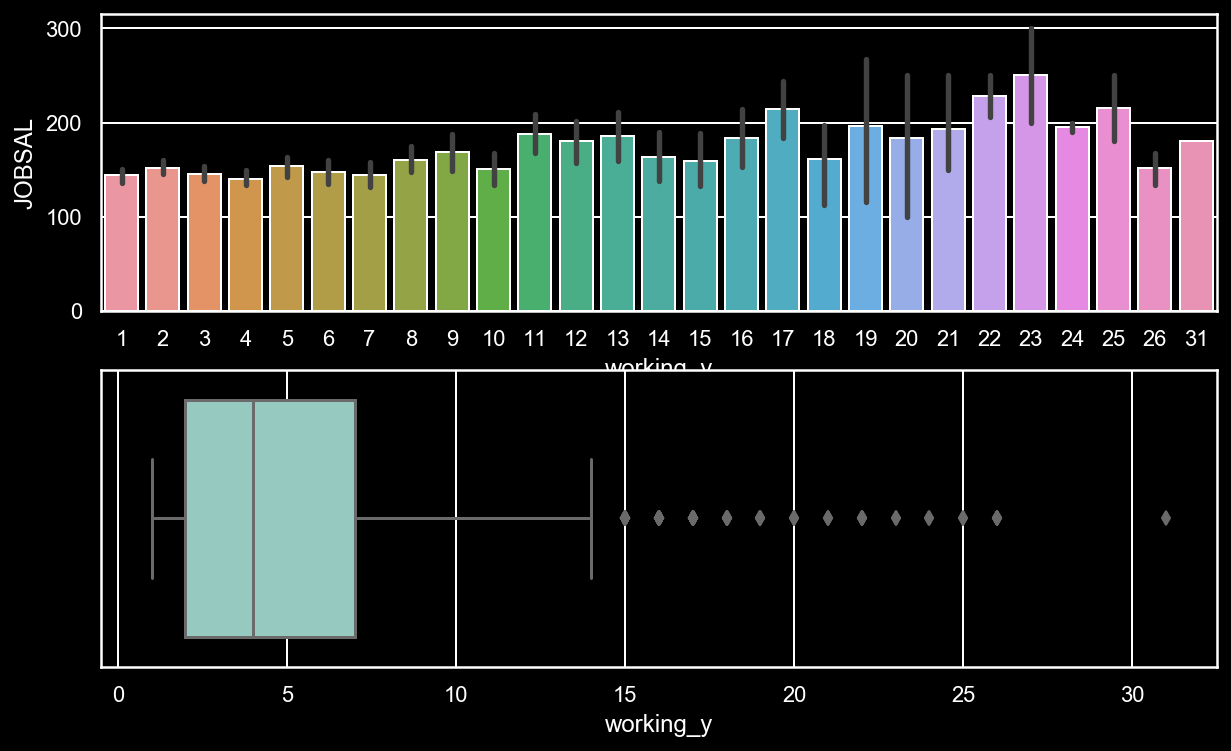

In [48]:
# 경력별 월급 확인-> 24년의 데이터가 이상 upper fence로 drop
plt.figure(figsize=(10, 6))

plt.subplot(211)
sns.barplot(x="working_y", y='JOBSAL', data = data_fin_drop)

plt.subplot(212)
sns.boxplot(data_fin_drop['working_y'])

plt.show()

In [49]:
np.percentile(data_fin_drop['working_y'], 75), np.percentile(data_fin_drop['working_y'], 25)
np.percentile(data_fin_drop['working_y'], 75)+1.5*(np.percentile(data_fin_drop['working_y'], 75)- np.percentile(data_fin_drop['working_y'], 25))
# upper fence=14.5

14.5

In [50]:
data_fin_1 = data_fin_drop[data_fin_drop['working_y'] < 14.5]

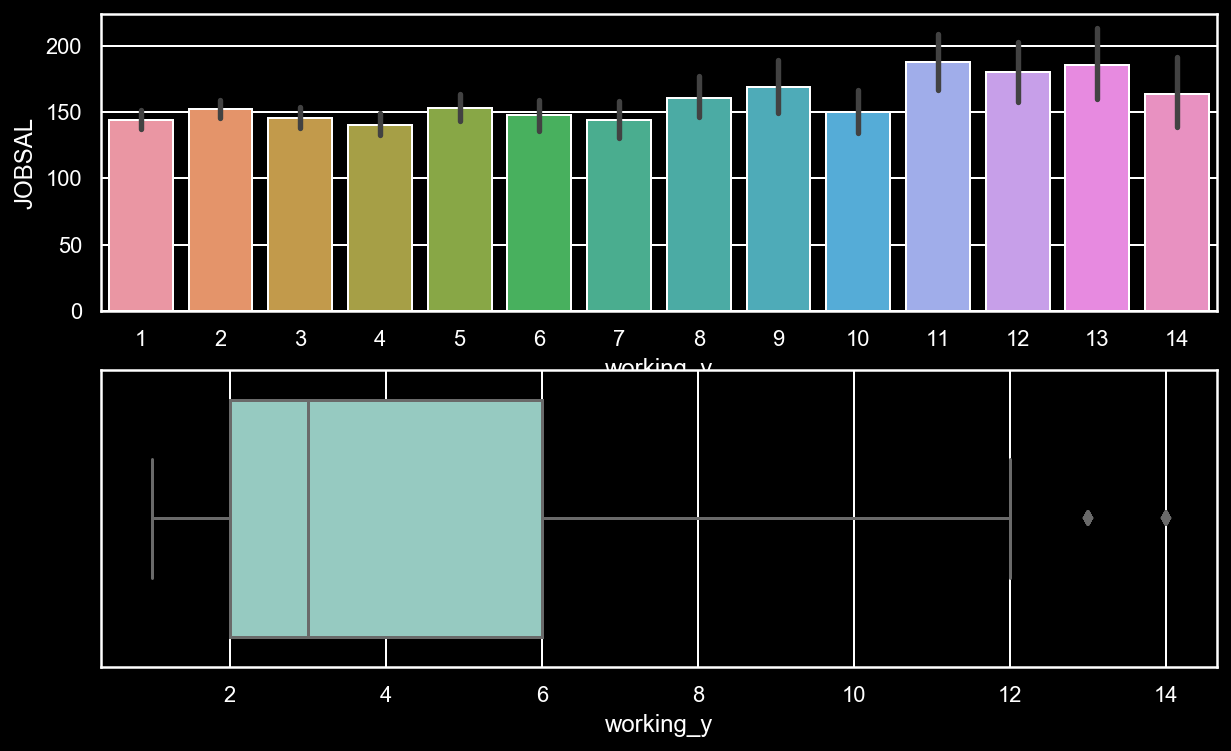

In [51]:
plt.figure(figsize=(10, 6))

plt.subplot(211)
sns.barplot(x="working_y", y='JOBSAL', data = data_fin_1)

plt.subplot(212)
sns.boxplot(data_fin_1['working_y'])

plt.show()

In [52]:
data_fin_1.columns

Index(['case', 'fa_job', 'fa_edu', 'life_15', 'fama_rel_15', 'age', 'edu',
       'marry_YN', 'hschool', 'univ_mjor', 'univ_area', 'jung_bi', 'level',
       'j_type', 'job_pp', 'job_1_in', 'JOBSAL', 'working_y'],
      dtype='object')

In [53]:
data_fin_1.drop(['job_1_in'], axis=1, inplace=True)

C:\Users\eunice\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [54]:
len(data_fin_1)

1877

# 1차 기본 전처리 완료

In [55]:
data_fin_1

case  fa_job  fa_edu  life_15  fama_rel_15   age  edu  marry_YN  \
0      1.0     5.0     4.0      3.0          2.0  32.0  6.0       1.0   
1      4.0     2.0     6.0      3.0          4.0  19.0  5.0       2.0   
2      4.0     7.0     3.0      3.0          3.0  19.0  4.0       2.0   
3      3.0     7.0     4.0      3.0          3.0  31.0  7.0       2.0   
4      1.0     3.0     5.0      3.0          2.0  25.0  7.0       2.0   
...    ...     ...     ...      ...          ...   ...  ...       ...   
1979   6.0     7.0     4.0      3.0          3.0  47.0  7.0       1.0   
1980   6.0    12.0     0.0      2.0          6.0  36.0  7.0       1.0   
1981   6.0     8.0     3.0      3.0          3.0  36.0  4.0       1.0   
1982   6.0     6.0     2.0      4.0          3.0  42.0  4.0       1.0   
1983   6.0     7.0     4.0      3.0          2.0  28.0  8.0       2.0   

      hschool  univ_mjor  univ_area  jung_bi  level  j_type  job_pp  JOBSAL  \
0         1.0        7.0       15.0      1.0    1.0     1.0     4.0   180.0   
1         1.0        0.0        0.0      2.0    1.0     2.0     2.0    32.0   
2         3.0        0.0        0.0      1.0    1.0     1.0     5.0   220.0   
3         2.0        9.0        1.0      1.0    1.0     1.0     7.0   200.0   
4         1.0        3.0        2.0      1.0    1.0     1.0     7.0   200.0   
...       ...        ...        ...      ...    ...     ...     ...     ...   
1979      1.0        6.0        6.0      1.0    0.0     1.0     2.0   200.0   
1980      1.0       10.0        6.0      1.0    0.0     1.0     5.0   250.0   
1981      3.0        0.0        0.0      1.0    0.0     1.0     2.0   200.0   
1982      3.0        0.0        0.0      2.0    0.0     1.0     1.0    60.0   
1983      1.0       12.0        2.0      1.0    0.0     9.0     3.0   250.0   

      working_y  
0            10  
1             1  
2             1  
3             1  
4             2  
...         ...  
1979          2  
1980          3  
1981          5  
1982          6  
1983          3  

[1877 rows x 17 columns]

In [62]:
data_fin_1.columns

Index(['case', 'fa_job', 'fa_edu', 'life_15', 'fama_rel_15', 'age', 'edu',
       'marry_YN', 'hschool', 'univ_mjor', 'univ_area', 'jung_bi', 'level',
       'j_type', 'job_pp', 'JOBSAL', 'working_y'],
      dtype='object')

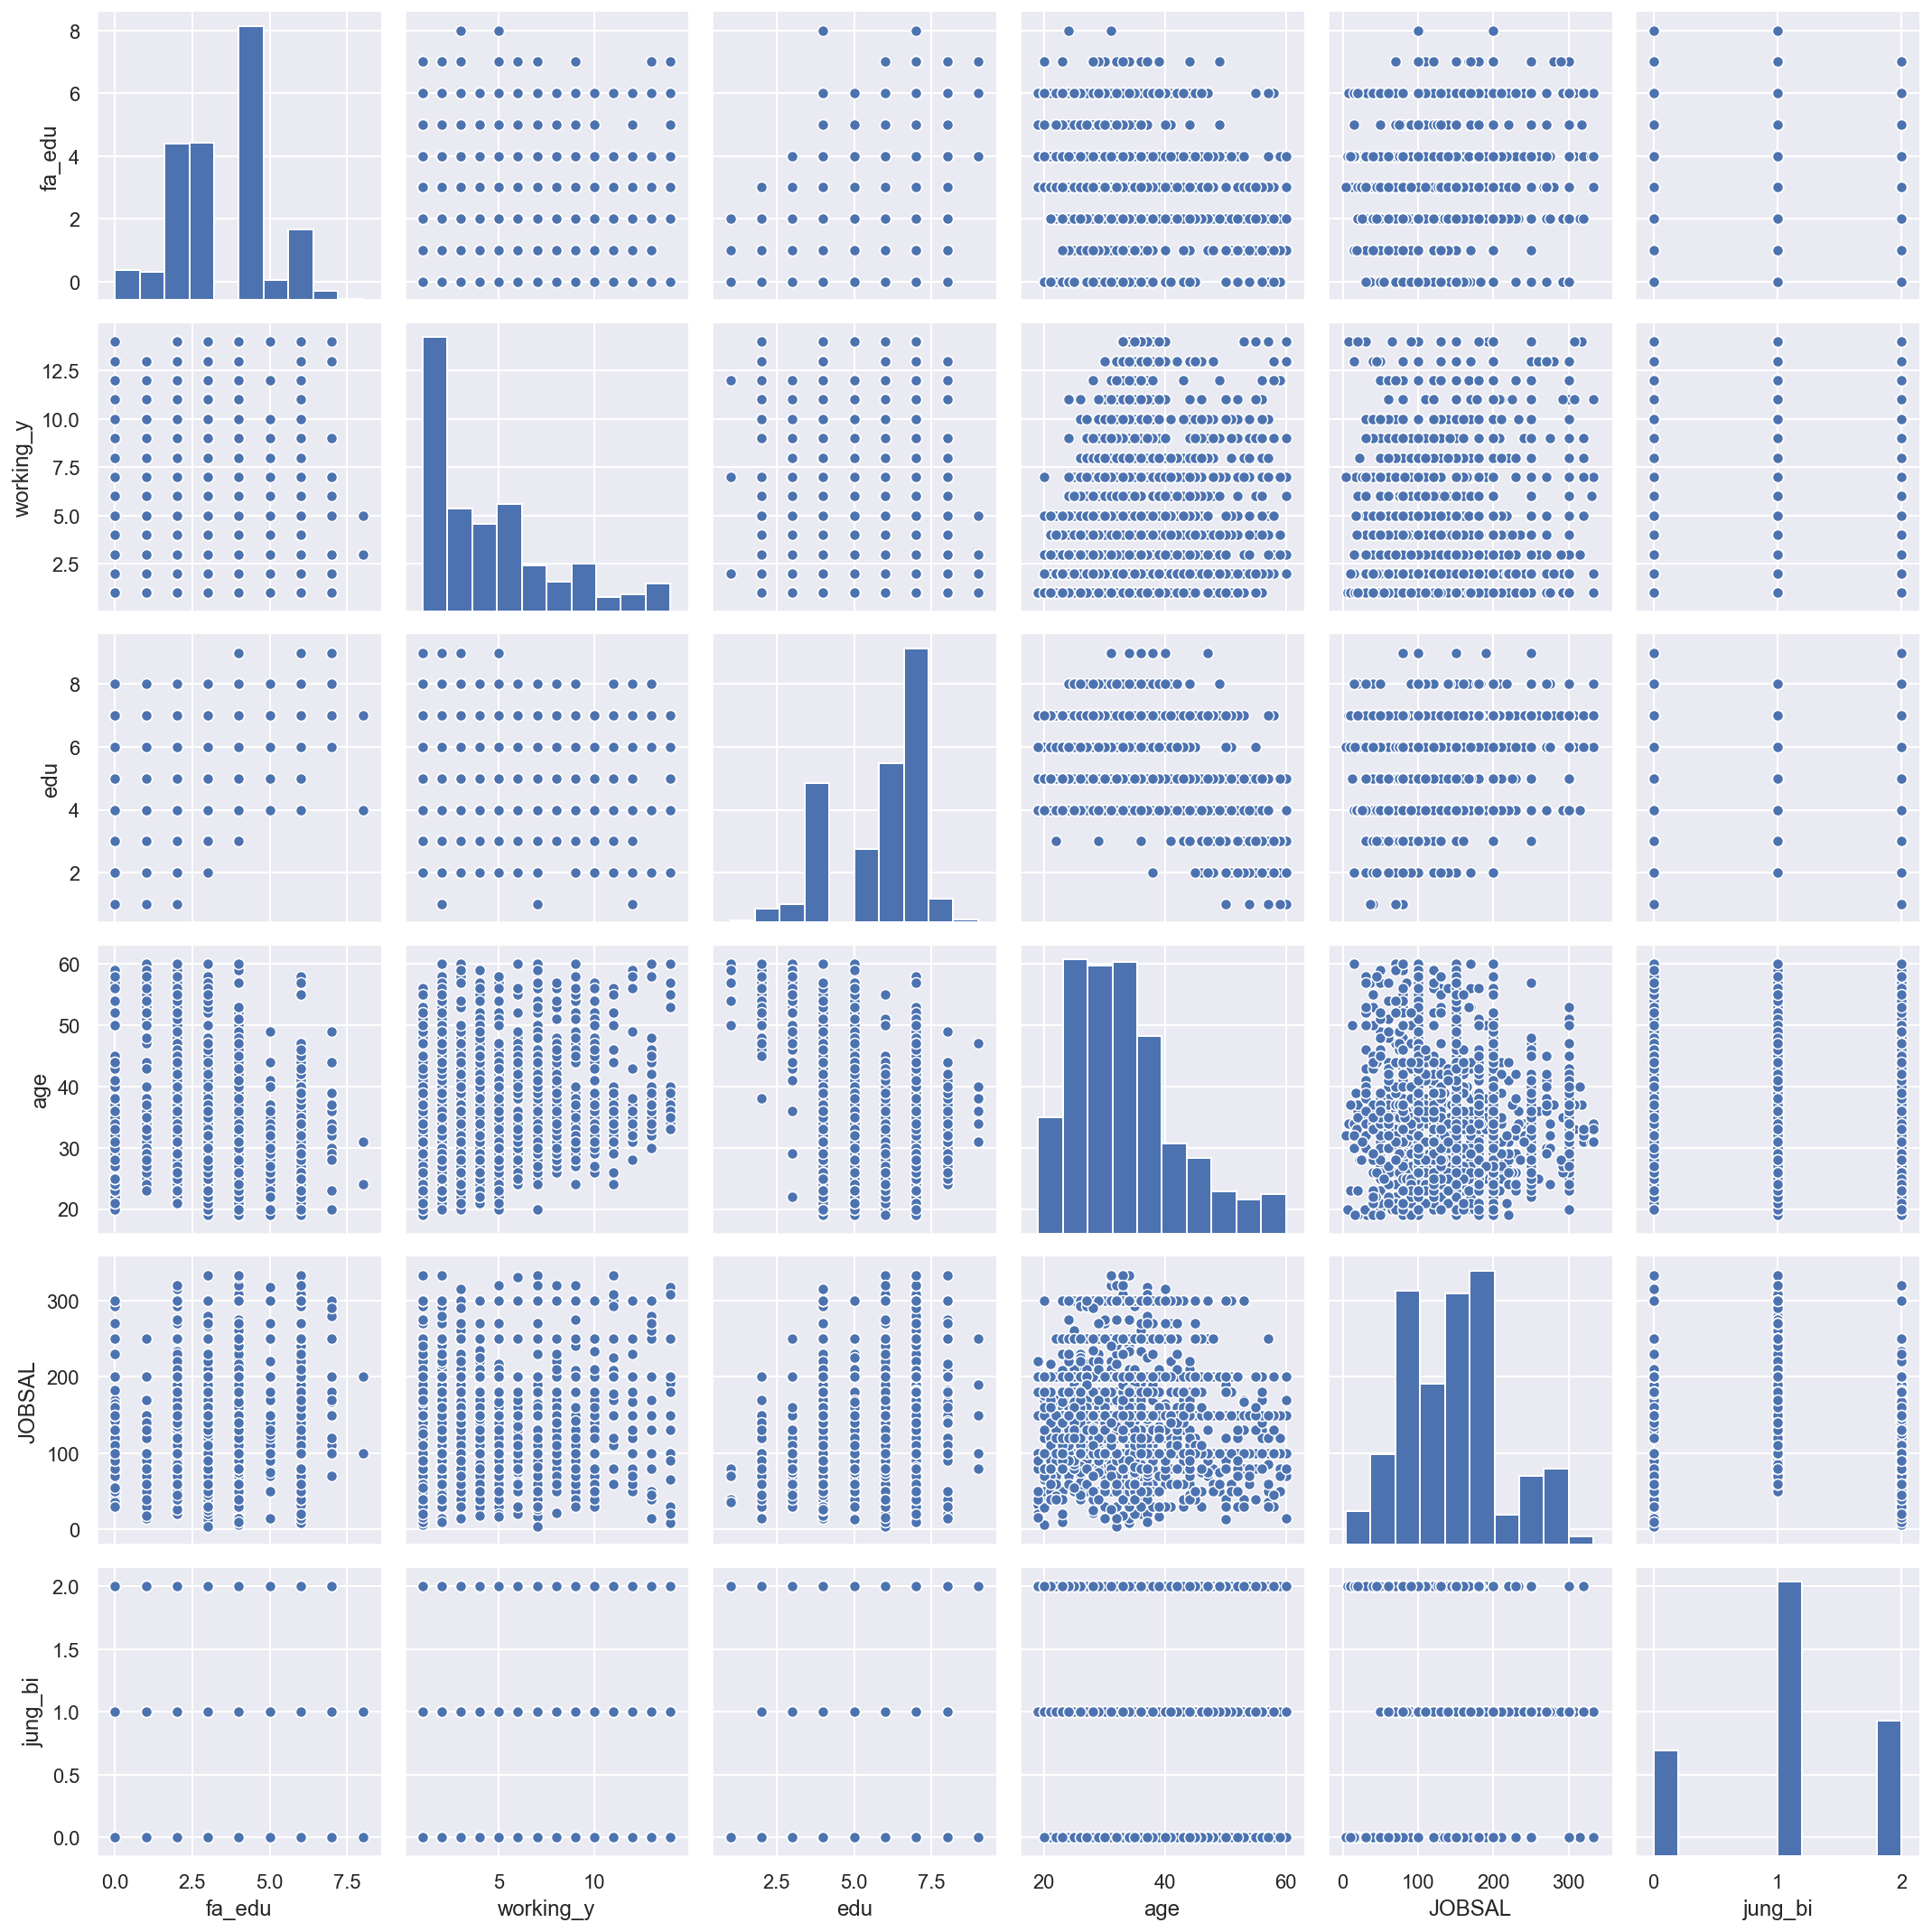

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns 
cols = ['fa_edu', 'working_y', 'edu', 'age', 'JOBSAL', 'jung_bi']
sns.pairplot(data_fin_1[cols], height=2.5)
plt.tight_layout()
plt.show()

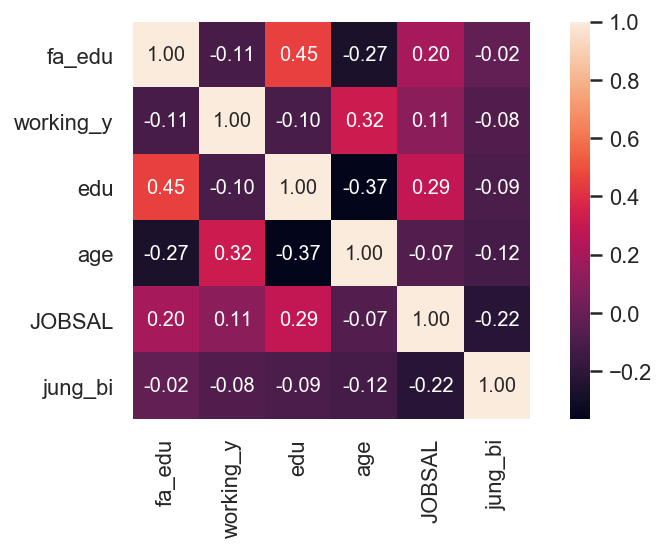

In [61]:
import numpy as np


cm = np.corrcoef(data_fin_1[cols].values.T)
sns.set(font_scale=1.0)
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 10},
                 yticklabels=cols,
                 xticklabels=cols)

plt.tight_layout()
plt.show()

In [ ]:
data_fin_1.to_csv("result_basic", index=False, encoding='utf-8')

# 원핫인코딩

In [ ]:
data_dummy = pd.get_dummies(data_fin_1, columns=['fa_job', 'fa_edu', 'life_15', 'fama_rel_15'
                                                 , 'edu', 'marry_YN', 'hschool', 'univ_mjor'
                                                 , 'univ_area', 'jung_bi', 'level', 'j_type', 'job_pp'])

In [ ]:
data_dummy.to_csv("result_one_hot", index=False, encoding='utf-8')

In [ ]:
data_dummy2 = pd.get_dummies(data_fin_1, columns=['edu', 'marry_YN', 
                                                  'univ_area', 'jung_bi', 'job_pp'])

In [ ]:
data_dummy2.to_csv("result_one_hot2", index=False, encoding='utf-8')